# Experiment 1: Performance
## How does the gazetteer-enhanced T5-ASP model perform compared to other NER models and in terms of contextual learning of entities?

### Datasets

In [1]:
import json

with open("/home/loebbert/projects/thesis/data/mlowner/lowner_train.json", encoding="utf-8") as file:
    lowner_train = json.load(file)

with open("/home/loebbert/projects/thesis/data/mlowner/lowner_dev.json", encoding="utf-8") as file:
    lowner_dev = json.load(file)

with open("/home/loebbert/projects/thesis/data/mlowner/lowner_test.json", encoding="utf-8") as file:
    lowner_test = json.load(file)

with open("/home/loebbert/projects/thesis/data/mlowner/lowner_gazetteer.json", encoding="utf-8") as file:
    lowner_gazetteer = json.load(file)

with open(
        "/home/loebbert/projects/thesis/data/multiconer/multiconer_test.json",
        encoding="utf-8") as file:
    multiconer_test = json.load(file)

In [8]:
datasets = [
    lowner_train, lowner_dev, lowner_test, lowner_gazetteer, multiconer_test,
    lowner_gazetteer + multiconer_test,
    lowner_train + lowner_gazetteer + multiconer_test
]
names = [
    "lowner_train",
    "lowner_dev",
    "lowner_test",
    "lowner_gazetteer",
    "multiconer_test",
    "lowner_gazetteer-multiconer_test",
    "lowner_train-lowner_gazetteer-multiconer_test",
]

### Dataset metrics

In [ ]:
from data_metrics.entity_coverage_ratio import confusion_matrix_expected_entity_coverage_ratio



cm_expected_entity_coverage = confusion_matrix_expected_entity_coverage_ratio(datasets, names)


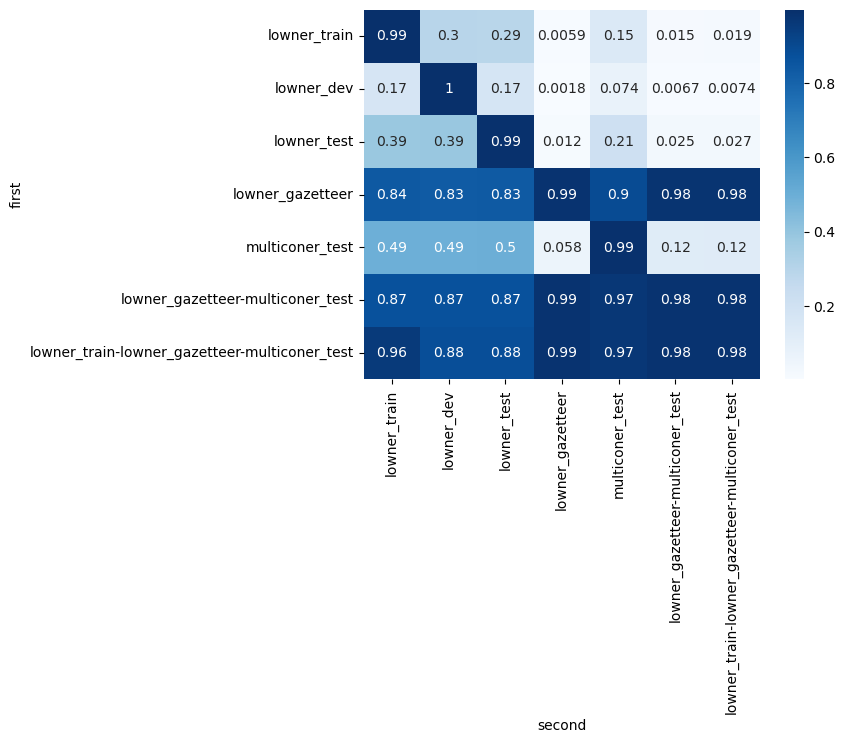

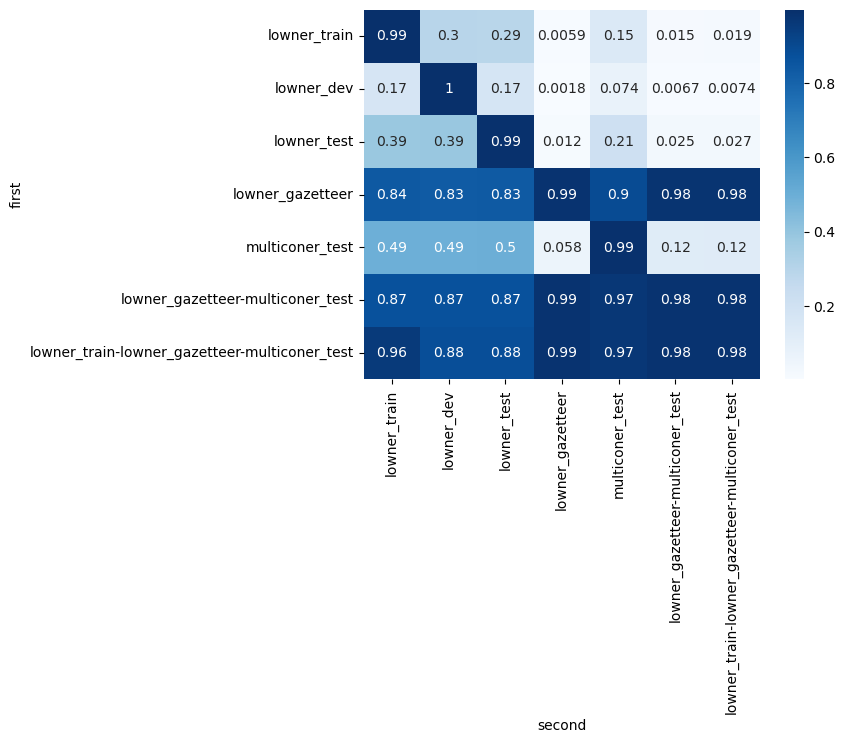

In [10]:
from data_metrics.utils import visualize_confusion_matrix

visualize_confusion_matrix(cm_expected_entity_coverage,
                           "expected_entity_coverage_ratio")

## Get expected entity coverage ratio for search results

In [2]:
from configs.asp_t5 import T5_BASE, FLAN_T5_BASE

t5_asp_fetahugaz_sent = T5_BASE.copy()
t5_asp_fetahugaz_sent.update({
    "adam_weight_decay": 0.011738749999999989,
    "asp_dropout_rate": 0.4540625,
    "asp_hidden_dim": 633,
    "gaz_search_algorithm": "bm25",
    "gaz_search_topk": 6,
    "gaz_use_mentions": False,
    "num_epochs": 16,
    "plm_learning_rate": 0.00017496219281663535,
    "search_join_method": "reciprocal_rank_fusion",
    "search_topk": 8,
    "sent_search_algorithm": "ann",
    "sent_search_topk": 6,
    "sent_use_mentions": True,
    "task_learning_rate": 0.0035849253731343286,
    "train_search_dropout": 0.05492957746478871,
    "warmup_ratio": 0.37917808219178084,
    "name": "t5_asp_fetahugaz_sent"
})

t5_asp_fetahugaz = FLAN_T5_BASE.copy()
t5_asp_fetahugaz.update({
    "adam_weight_decay": 0.011738749999999989,
    "asp_dropout_rate": 0.4540625,
    "asp_hidden_dim": 633,
    "num_epochs": 16,
    "plm_learning_rate": 0.00017496219281663535,
    "search_algorithm": "bm25",
    "search_topk": 8,
    "task_learning_rate": 0.0035849253731343286,
    "train_search_dropout": 0.05492957746478871,
    "use_mentions": False,
    "warmup_ratio": 0.37917808219178084,
    "name": "t5_asp_fetahugaz"
})

t5_asp_gaz = FLAN_T5_BASE.copy()
t5_asp_gaz.update({
    "adam_weight_decay": 0.018862500000000015,
    "asp_dropout_rate": 0.43875,
    "asp_hidden_dim": 799,
    "num_epochs": 17,
    "plm_learning_rate": 0.00020887755102040807,
    "search_algorithm": "bm25",
    "search_topk": 6,
    "task_learning_rate": 0.003949473684210526,
    "train_search_dropout": 0.028260869565217374,
    "use_mentions": False,
    "warmup_ratio": 0.20864864864864865,
    "name": "t5_asp_gaz"
})

t5_asp_gaz_sent = T5_BASE.copy()
t5_asp_gaz_sent.update({
    "adam_weight_decay": 0.011738749999999989,
    "asp_dropout_rate": 0.4540625,
    "asp_hidden_dim": 633,
    "gaz_search_algorithm": "bm25",
    "gaz_search_topk": 6,
    "gaz_use_mentions": False,
    "num_epochs": 24,
    "plm_learning_rate": 0.00017496219281663535,
    "search_join_method": "reciprocal_rank_fusion",
    "search_topk": 8,
    "sent_search_algorithm": "ann",
    "sent_search_topk": 6,
    "sent_use_mentions": True,
    "task_learning_rate": 0.0035849253731343286,
    "train_search_dropout": 0.05492957746478871,
    "warmup_ratio": 0.37917808219178084,
    "name": "t5_asp_gaz_sent"
})

t5_asp_sent = T5_BASE.copy()
t5_asp_sent.update({
    "adam_weight_decay": 0.49637507889057786,
    "asp_dropout_rate": 0.3,
    "asp_hidden_dim": 142,
    "num_epochs": 20,
    "plm_learning_rate": 5e-05,
    "search_algorithm": "ann",
    "search_topk": 8,
    "task_learning_rate": 0.0013480523331922776,
    "train_search_dropout": 0.21126587935893093,
    "use_mentions": True,
    "warmup_ratio": 0.184451637360714,
    "name": "t5_asp_sent"
})


{'plm_pretrained_name_or_path': 't5-base', 'plm_tokenizer_name': 't5-small', 'model_max_length': 4096, 'mention_start_token': '<m>', 'mention_end_token': '</m>', 'asp_hidden_dim': 633, 'asp_dropout_rate': 0.4540625, 'asp_init_std': 0.02, 'asp_activation': 'relu', 'num_labels': 6, 'max_nest_depth': 1, 'beam_size': 1, 'plm_learning_rate': 0.00017496219281663535, 'plm_scheduler': 'linear_with_warmup', 'task_learning_rate': 0.0035849253731343286, 'task_scheduler': 'linear_with_warmup', 'adam_eps': 1e-08, 'adam_weight_decay': 0.011738749999999989, 'warmup_ratio': 0.37917808219178084, 'num_epochs': 16, 'gradient_accumulation_steps': 1, 'batch_size': 40, 'train_len': 0, 'fused': None, 'gaz_search_algorithm': 'bm25', 'gaz_search_topk': 6, 'gaz_use_mentions': False, 'search_join_method': 'reciprocal_rank_fusion', 'search_topk': 8, 'sent_search_algorithm': 'ann', 'sent_search_topk': 6, 'sent_use_mentions': True, 'train_search_dropout': 0.05492957746478871, 'name': 't5_asp_fetahugaz_sent'}


In [14]:
from hyperparameter_tuning.t5_asp_fetahugaz_sent import setup_database as setup_database_fetahugaz_sent
from hyperparameter_tuning.t5_asp_gaz_sent import setup_database as setup_database_gaz_sent
from hyperparameter_tuning.t5_asp_fetahugaz import setup_database as setup_database_fetahugaz
from hyperparameter_tuning.t5_asp_gaz import setup_database as setup_database_gaz
from hyperparameter_tuning.t5_asp_sent import setup_database as setup_database_sent
from hyperparameter_tuning.training import get_search_results
from lightning.fabric.utilities.seed import seed_everything
import pickle
from data_metrics.entity_coverage_ratio import entity_coverage_ratio
import pandas as pd
import os

seeds = [1, 2, 3]
search_result_eecr = []

for seed in seeds:
    # seed
    seed_everything(seed)

    for config in [
        t5_asp_fetahugaz_sent, t5_asp_fetahugaz, t5_asp_gaz, t5_asp_gaz_sent, t5_asp_sent
    ]:

        # setup database
        if config["name"] == "t5_asp_fetahugaz_sent":
            search = setup_database_fetahugaz_sent(
                config["sent_search_algorithm"],
                config["sent_search_topk"],
                config["gaz_search_algorithm"],
                config["gaz_search_topk"],
                config["search_join_method"],
                config["search_topk"],
            )
        if config["name"] == "t5_asp_gaz_sent":
            search = setup_database_gaz_sent(
                config["sent_search_algorithm"],
                config["sent_search_topk"],
                config["gaz_search_algorithm"],
                config["gaz_search_topk"],
                config["search_join_method"],
                config["search_topk"],
            )
        if config["name"] == "t5_asp_fetahugaz":
            search = setup_database_fetahugaz(
                config["search_algorithm"],
                config["search_topk"]
            )
        if config["name"] == "t5_asp_gaz":
            search = setup_database_gaz(config["search_algorithm"],
                                              config["search_topk"])
        if config["name"] == "t5_asp_sent":
            search = setup_database_sent(config["search_algorithm"],
                                        config["search_topk"])

        # go through all datasets
        for dataset, dataset_name in [(lowner_train, "lowner_train"),
                                    (lowner_dev, "lowner_dev"),
                                    (lowner_test, "lowner_test")
                                    ]:

            search_results = get_search_results(
                search, dataset)

            # save search results for augmentation
            file_name = os.path.join(
                "/home/loebbert/projects/thesis", "experiments", "01_performance", "search_results", f"{str(seed)}_{config['name']}_{dataset_name}.pkl")

            with open(file_name, "wb") as file:
                pickle.dump(search_results, file)

            # calculate the expected entity coverage ratio for each sample
            for idx, item in enumerate(dataset):
                results = [doc.to_dict() for doc in search_results[idx]]
                _, _, eecr = entity_coverage_ratio(results, [item])
                search_result_eecr.append({
                    "dataset": dataset_name,
                    "model": config["name"],
                    "doc_id": item["doc_id"],
                    "seed": seed,
                    "eecr": eecr
                })

df = pd.DataFrame.from_records(search_result_eecr)
file_name = os.path.join(
    "/home/loebbert/projects/thesis", "experiments", "01_performance",
    "search_result_eecr_df.pkl"
)
df.to_pickle(file_name)

Global seed set to 1


NameError: name 't5_asp_fetahugaz_sent' is not defined

In [15]:
import pandas as pd
import os

df = pd.read_pickle(os.path.join("/home/loebbert/projects/thesis", "experiments",
                         "01_performance", "search_result_eecr_df.pkl"))

In [21]:
mean_df = df.pivot_table(values="eecr", index=["model", "dataset", "seed"], aggfunc="mean").reset_index()
mean_df

,model,dataset,seed,eecr
0,t5_asp_fetahugaz,lowner_dev,1,0.501011
1,t5_asp_fetahugaz,lowner_dev,2,0.501011
2,t5_asp_fetahugaz,lowner_dev,3,0.501011
3,t5_asp_fetahugaz,lowner_test,1,0.507653
4,t5_asp_fetahugaz,lowner_test,2,0.507653
5,t5_asp_fetahugaz,lowner_test,3,0.507653
6,t5_asp_fetahugaz,lowner_train,1,0.499984
7,t5_asp_fetahugaz,lowner_train,2,0.499984
8,t5_asp_fetahugaz,lowner_train,3,0.499984
9,t5_asp_fetahugaz_sent,lowner_dev,1,0.546537


In [27]:
mean_df_mean = mean_df.groupby(["model", "dataset"])["eecr"].mean().reset_index()
mean_df_std = mean_df.groupby(["model", "dataset"])["eecr"].std().reset_index()

In [31]:
mean_df_mean.pivot_table(values="eecr", index="model", columns="dataset")


dataset,lowner_dev,lowner_test,lowner_train
model,,,
t5_asp_fetahugaz,0.501011,0.507653,0.499984
t5_asp_fetahugaz_sent,0.546537,0.549414,0.545299
t5_asp_gaz,0.297961,0.302970,0.301045
t5_asp_gaz_sent,0.333373,0.339839,0.338090
t5_asp_sent,0.226344,0.228097,0.229293


In [32]:
mean_df_std.pivot_table(values="eecr", index="model", columns="dataset")

dataset,lowner_dev,lowner_test,lowner_train
model,,,
t5_asp_fetahugaz,0.0,0.0,0.0
t5_asp_fetahugaz_sent,0.0,0.0,0.0
t5_asp_gaz,0.0,0.0,0.0
t5_asp_gaz_sent,0.0,0.0,0.0
t5_asp_sent,0.0,0.0,0.0


In [ ]:
seed_everything(2)

search = setup_database(
    config["sent_search_algorithm"],
    config["sent_search_topk"],
    config["gaz_search_algorithm"],
    config["gaz_search_topk"],
    config["search_join_method"],
    config["search_topk"],
)

lowner_train_search_results_2 = get_search_results(search, lowner_train)
lowner_dev_search_results_2 = get_search_results(search, lowner_dev)
lowner_test_search_results_2 = get_search_results(search, lowner_test)